In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler


In [6]:
!pip install openpyxl
import openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


In [4]:
df = pd.read_excel("data/DataSparePart.xlsx")
df.head()

,nama_barang,harga,diskon,harga_kelas
0,Kampas Kopling,520000,68,Murah
1,Lampu Belakang,930000,10,Mahal
2,Rem Cakram,150000,1,Murah
3,Filter Udara,720000,8,Mahal
4,Lampu Depan,610000,3,Mahal


In [5]:
df['nama_barang'].unique()

array(['Kampas Kopling', 'Lampu Belakang', 'Rem Cakram', 'Filter Udara',
       'Lampu Depan', 'Ban Belakang', 'Alternator', 'Kampas Rem',
       'Oli Mesin', 'Oli Gardan', 'Aki', 'Busi', 'Radiator', 'Ban Depan'],
      dtype=object)

In [28]:
df = df.drop(columns=["nama_barang"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   harga        1000 non-null   int64 
 1   diskon       1000 non-null   int64 
 2   harga_kelas  1000 non-null   object
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [30]:
df['harga_kelas'] = df['harga_kelas'].map({"Mahal": 1,"Murah": 0})
df.head()

,harga,diskon,harga_kelas
0,520000,68,0
1,930000,10,1
2,150000,1,0
3,720000,8,1
4,610000,3,1


In [31]:
X = df[['harga', 'diskon']]
y = df['harga_kelas']

X.shape, y.shape

((1000, 2), (1000,))

In [32]:
scaler = StandardScaler()
X[['harga']] = scaler.fit_transform(df[['harga']])
X[['diskon']] = scaler.fit_transform(df[['diskon']])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4520\1496884410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['harga']] = scaler.fit_transform(df[['harga']])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4520\1496884410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['diskon']] = scaler.fit_transform(df[['diskon']])


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape

((800, 2), (800,))

In [34]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

Accuracy : 0.94
************ Classification Report  *******************
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       114
           1       0.92      0.94      0.93        86

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

*******************************************************


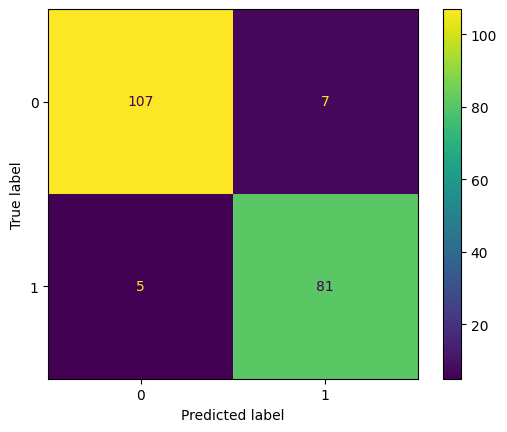

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Accuracy :", accuracy_score(y_test, y_pred))
print("************ Classification Report  *******************")
print(classification_report(y_test, y_pred))
print("*******************************************************")
cnf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cnf_matrix).plot()